In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('df_pengolahan.csv')

In [24]:
#this line is to make sure the format is correct and readable by pd.to_datetime

df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df['Time'] = pd.to_datetime(df['Time'], errors = 'coerce')
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'], errors = 'coerce')

In [5]:
#df.to_csv('df_pengolahan.csv', index=False, header=True)

In [26]:
df['Day_of_week'] = df['Date'].dt.day_name()

In [27]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Borough,Zone,Date,Time,Day_of_week
0,B02617,2015-05-17 09:47:00,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:47:00,Sunday
1,B02617,2015-05-17 09:50:00,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:50:00,Sunday
2,B02617,2015-05-17 09:53:00,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:53:00,Sunday
3,B02617,2015-05-17 10:00:00,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday
4,B02617,2015-05-17 10:00:00,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday


In [34]:
#This is to makesure the date_time is typed as datetime and be the index 
df = df.set_index('Pickup_date')

In [38]:
df.head()

,Dispatching_base_num,Affiliated_base_num,locationID,Borough,Zone,Date,Time,Day_of_week
Pickup_date,,,,,,,,
2015-05-17 09:47:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:47:00,Sunday
2015-05-17 09:50:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:50:00,Sunday
2015-05-17 09:53:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:53:00,Sunday
2015-05-17 10:00:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday
2015-05-17 10:00:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday


In [13]:
#df['Pickup_date'].between_time('09:47:00' , '09:48:00')

Series([], Name: Pickup_date, dtype: datetime64[ns])

In [81]:
#Example for making boolean with between_time
#df.index.isin(df.between_time('06:00', '12:00', include_start=True, include_end=True).index)

array([ True,  True,  True, ..., False, False,  True])

In [39]:
df['Morning'] = df.index.isin(df.between_time('06:00', '12:00', include_start=True, include_end=True).index)
df['Afternoon'] = df.index.isin(df.between_time('12:00', '18:00', include_start=True, include_end=True).index)
df['Evening'] = df.index.isin(df.between_time('18:00', '00:00', include_start=True, include_end=True).index)
df['Night'] = df.index.isin(df.between_time('00:00', '06:00', include_start=True, include_end=True).index)

In [40]:
df.head()

,Dispatching_base_num,Affiliated_base_num,locationID,Borough,Zone,Date,Time,Day_of_week,Morning,Afternoon,Evening,Night
Pickup_date,,,,,,,,,,,,
2015-05-17 09:47:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:47:00,Sunday,True,False,False,False
2015-05-17 09:50:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:50:00,Sunday,True,False,False,False
2015-05-17 09:53:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:53:00,Sunday,True,False,False,False
2015-05-17 10:00:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday,True,False,False,False
2015-05-17 10:00:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday,True,False,False,False


In [41]:
daily = df.resample('D').sum()

In [42]:
daily.head()

,locationID,Morning,Afternoon,Evening,Night
Pickup_date,,,,,
2015-01-01,7982201,4500,10248,11215,29420
2015-01-02,5735627,6635,12059,16253,3523
2015-01-03,8597162,5721,19175,25308,7181
2015-01-04,5822321,6184,12717,11928,9170
2015-01-05,6416850,11357,11316,15771,3414


In [43]:
del daily['locationID']

In [44]:
daily

,Morning,Afternoon,Evening,Night
Pickup_date,,,,
2015-01-01,4500,10248,11215,29420
2015-01-02,6635,12059,16253,3523
2015-01-03,5721,19175,25308,7181
2015-01-04,6184,12717,11928,9170
2015-01-05,11357,11316,15771,3414
...,...,...,...,...
2015-06-26,21544,25777,39891,12584
2015-06-27,14722,36100,60911,24834
2015-06-28,14104,25648,26326,27368


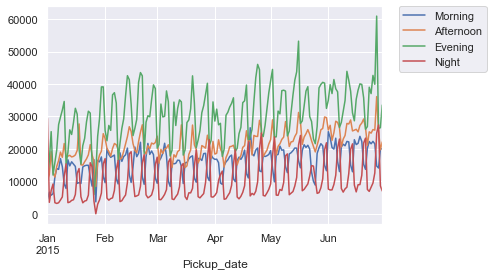

In [45]:
sns.set()
daily.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


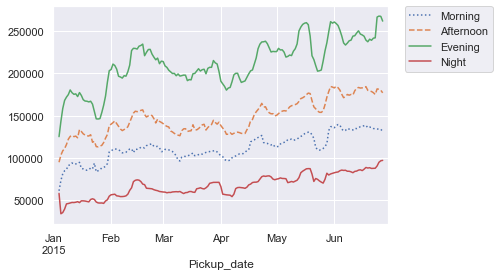

In [46]:
daily.rolling(7, center=True,
 win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [47]:
#this was used to make the index correct
#daily['Day_of_week'] = daily.index.day_name()
#print(daily.index.name)

Text(0.5, 0, 'Pickup Date')

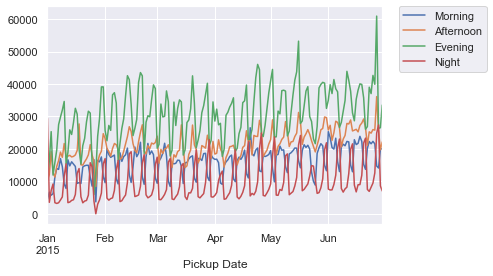

In [49]:
daily.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pickup Date')

In [50]:
by_weekday = daily.groupby(daily.index.day_name()).mean()

Text(0.5, 0, 'Pickup Day')

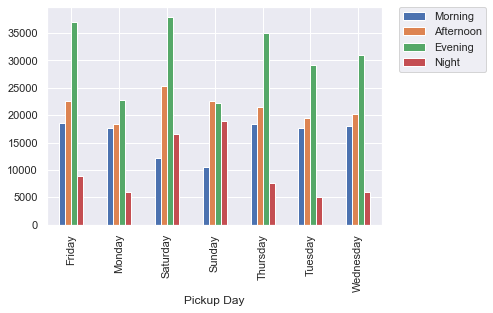

In [52]:
by_weekday.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #example for legend location outside
plt.xlabel('Pickup Day')

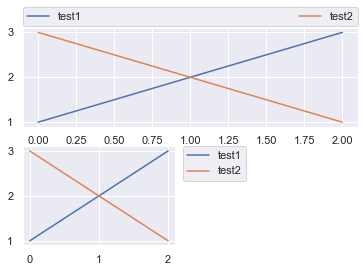

In [53]:
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [71]:
#df.plot()

In [55]:
daily.head()

,Morning,Afternoon,Evening,Night
Pickup_date,,,,
2015-01-01,4500,10248,11215,29420
2015-01-02,6635,12059,16253,3523
2015-01-03,5721,19175,25308,7181
2015-01-04,6184,12717,11928,9170
2015-01-05,11357,11316,15771,3414


In [56]:
#daily_model = df.resample('D').count()

In [57]:
#daily_model.head()

In [58]:
df.head()

,Dispatching_base_num,Affiliated_base_num,locationID,Borough,Zone,Date,Time,Day_of_week,Morning,Afternoon,Evening,Night
Pickup_date,,,,,,,,,,,,
2015-05-17 09:47:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:47:00,Sunday,True,False,False,False
2015-05-17 09:50:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:50:00,Sunday,True,False,False,False
2015-05-17 09:53:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 09:53:00,Sunday,True,False,False,False
2015-05-17 10:00:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday,True,False,False,False
2015-05-17 10:00:00,B02617,B02617,141,Manhattan,Lenox Hill West,2015-05-17,2021-03-05 10:00:00,Sunday,True,False,False,False


In [59]:
#daily.head()

In [60]:
rain_df = pd.read_csv('Central_park_PRCP_dataframe.csv')

In [61]:
rain_df.head()

,date,PRCP
0,2015-01-01,0.0
1,2015-01-02,0.0
2,2015-01-03,0.0
3,2015-01-04,0.0
4,2015-01-05,0.0


In [62]:
#rain_df.plot('date', 'PRCP', kind='scatter')()

In [63]:
#daily['PRCP'] = rain_df['PRCP']

In [64]:
#daily.head()

In [365]:
#daily.dropna()

,Morning,Afternoon,Evening,Night,Day_of_week,PRCP
Pickup_date,,,,,,


In [66]:
daily.head()

,Morning,Afternoon,Evening,Night
Pickup_date,,,,
2015-01-01,4500,10248,11215,29420
2015-01-02,6635,12059,16253,3523
2015-01-03,5721,19175,25308,7181
2015-01-04,6184,12717,11928,9170
2015-01-05,11357,11316,15771,3414


In [67]:
TAVG_df = pd.read_csv('central_park_real.csv')

In [68]:
TAVG_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-01-01,7.16,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-01-02,7.16,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-01-03,6.49,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,W"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-01-04,6.49,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2015-01-05,10.51,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
weather_df = pd.DataFrame([])
weather_df['TMAX'] = TAVG_df['TMAX']
weather_df['TMIN'] = TAVG_df['TMIN']
weather_df['Name'] = TAVG_df['NAME']
weather_df['date'] = TAVG_df['DATE']
weather_df['Latitude'] = TAVG_df['LATITUDE']
weather_df['Longitude'] = TAVG_df['LONGITUDE']
weather_df['Snow'] = TAVG_df['SNOW']
weather_df['Prcp'] = TAVG_df['PRCP']

In [70]:
weather_df.head()

,TMAX,TMIN,Name,date,Latitude,Longitude,Snow,Prcp
0,39,27,"NY CITY CENTRAL PARK, NY US",2015-01-01,40.77898,-73.96925,0.0,0.00
1,42,35,"NY CITY CENTRAL PARK, NY US",2015-01-02,40.77898,-73.96925,0.0,0.00
2,42,33,"NY CITY CENTRAL PARK, NY US",2015-01-03,40.77898,-73.96925,0.0,0.71
3,56,41,"NY CITY CENTRAL PARK, NY US",2015-01-04,40.77898,-73.96925,0.0,0.30
4,49,21,"NY CITY CENTRAL PARK, NY US",2015-01-05,40.77898,-73.96925,0.0,0.00


In [72]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date']

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: date, Length: 365, dtype: datetime64[ns]

In [73]:
left = daily
right = weather_df
daily['date'] = daily.index

In [74]:
daily.head()

,Morning,Afternoon,Evening,Night,date
Pickup_date,,,,,
2015-01-01,4500,10248,11215,29420,2015-01-01
2015-01-02,6635,12059,16253,3523,2015-01-02
2015-01-03,5721,19175,25308,7181,2015-01-03
2015-01-04,6184,12717,11928,9170,2015-01-04
2015-01-05,11357,11316,15771,3414,2015-01-05


In [76]:
#df['Date'] = pd.to_datetime(df['Date']
#TAVG_df['date'] = pd.to_datetime(TAVG_df['date'])

In [77]:
#TAVG_df.head()

In [79]:
daily_with_weather_df = pd.merge(left, right, how="inner", on='date')

In [80]:
daily_with_weather_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,Snow,Prcp
0,4500,10248,11215,29420,2015-01-01,39,27,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00
1,6635,12059,16253,3523,2015-01-02,42,35,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00
2,5721,19175,25308,7181,2015-01-03,42,33,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.71
3,6184,12717,11928,9170,2015-01-04,56,41,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.30
4,11357,11316,15771,3414,2015-01-05,49,21,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00


In [81]:
x = daily_with_weather_df['date']
y1 = daily_with_weather_df['Morning']
y2 = daily_with_weather_df['Afternoon']
y3 = daily_with_weather_df['Evening']
y4 = daily_with_weather_df['Night']

Text(0.5, 0, 'Pickup Date')

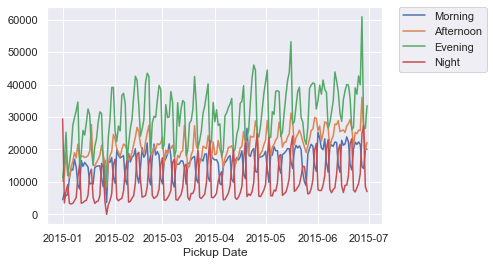

In [82]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

plt.plot(x,y1, label = "Morning")
plt.plot(x,y2, label = "Afternoon")
plt.plot(x,y3, label = "Evening")
plt.plot(x,y4, label = "Night")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pickup Date')

Text(0.5, 0, 'Pickup Date')

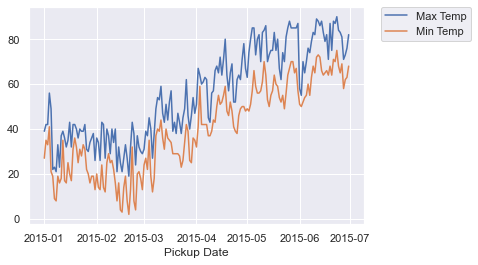

In [83]:
y1 = daily_with_weather_df['TMAX']
y2 = daily_with_weather_df['TMIN']

x =  daily_with_weather_df['date']
plt.plot(x,y1, label='Max Temp')
plt.plot(x,y2, label='Min Temp')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pickup Date')

In [85]:
#y = daily_with_weather_df['TAVG']
#x = daily_with_weather_df['date']
#plt.plot(x,y)

In [86]:
#y = daily_with_weather_df['Morning']
#x1 = daily_with_weather_df['TMAX']
#x2 = daily_with_weather_df['TMIN']

#fig, ax = plt.subplots(2)
#ax[0].scatter(x1, y, label ='Morning/TMAX', color='orange')
#ax[1].scatter(x2, y, label ='Morning/TMIN', color='blue')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [87]:
#y = daily_with_weather_df['Afternoon']
#x1 = daily_with_weather_df['TMAX']
#x2 = daily_with_weather_df['TMIN']

#fig, ax = plt.subplots(2)
#ax[0].scatter(x1, y, label ='Morning/TMAX', color='orange')
#ax[1].scatter(x2, y, label ='Morning/TMIN', color='blue')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [88]:
#y = daily_with_weather_df['Evening']
#x1 = daily_with_weather_df['TMAX']
#x2 = daily_with_weather_df['TMIN']

#fig, ax = plt.subplots(2)
#ax[0].scatter(x1, y, label ='Morning/TMAX', color='orange')
#ax[1].scatter(x2, y, label ='Morning/TMIN', color='blue')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [89]:
#y = daily_with_weather_df['Night']
#x1 = daily_with_weather_df['TMAX']
#x2 = daily_with_weather_df['TMIN']

#fig, ax = plt.subplots(2)
#ax[0].scatter(x1, y, label ='Morning/TMAX', color='orange')
#ax[1].scatter(x2, y, label ='Morning/TMIN', color='blue')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [90]:
daily_with_weather_df['TAVG'] = (daily_with_weather_df['TMAX'] + daily_with_weather_df['TMIN'])/2

In [91]:
daily_with_weather_df['TAVG']

0      33.0
1      38.5
2      37.5
3      48.5
4      35.0
       ... 
176    75.0
177    64.5
178    67.5
179    69.5
180    75.0
Name: TAVG, Length: 181, dtype: float64

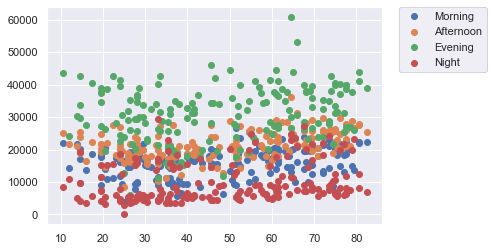

In [92]:
y1 = daily_with_weather_df['Morning']
y2 = daily_with_weather_df['Afternoon']
y3 = daily_with_weather_df['Evening']
y4 = daily_with_weather_df['Night']

x = daily_with_weather_df['TAVG']

#fig, ax = plt.subplots(4)

plt.scatter(x,y1, label='Morning')
plt.scatter(x,y2, label='Afternoon')
plt.scatter(x,y3, label='Evening')
plt.scatter(x,y4, label='Night')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

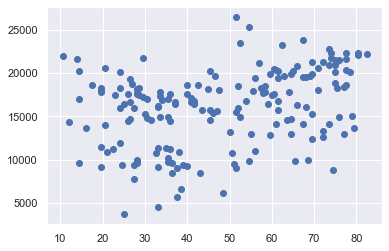

In [93]:
y = daily_with_weather_df['Morning']
x = daily_with_weather_df['TAVG']

plt.scatter(x,y )

In [94]:
daily_with_weather_df

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,Snow,Prcp,TAVG
0,4500,10248,11215,29420,2015-01-01,39,27,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,33.0
1,6635,12059,16253,3523,2015-01-02,42,35,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,38.5
2,5721,19175,25308,7181,2015-01-03,42,33,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.71,37.5
3,6184,12717,11928,9170,2015-01-04,56,41,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.30,48.5
4,11357,11316,15771,3414,2015-01-05,49,21,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,21544,25777,39891,12584,2015-06-26,81,69,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,75.0
177,14722,36100,60911,24834,2015-06-27,71,58,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,1.12,64.5
178,14104,25648,26326,27368,2015-06-28,73,62,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.29,67.5
179,19861,19693,26519,8598,2015-06-29,76,63,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,69.5


<BarContainer object of 181 artists>

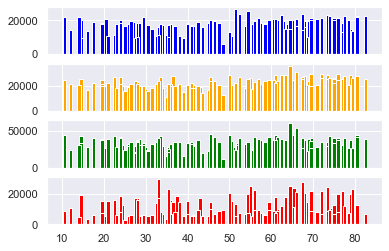

In [95]:
y1 = daily_with_weather_df['Morning']
y2 = daily_with_weather_df['Afternoon']
y3 = daily_with_weather_df['Evening']
y4 = daily_with_weather_df['Night']

x = daily_with_weather_df['TAVG']

fig, ax = plt.subplots(4)

#ax.set_ylabel('# of Trips')
#ax.set_title('# of Trips by Temperature and Time of Day')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
#ax.legend()

#ax.bar(x - width/2, y1, width, label='Morning', color = 'blue')
#ax.bar(x - width/2, y2, width, label='Afternoon', color ='orange')

ax[0].bar(x,y1, label='Morning', color = 'blue')
ax[1].bar(x,y2, label='Afternoon', color = 'orange')
ax[2].bar(x,y3, label='Evening', color = 'green')
ax[3].bar(x,y4, label='Night', color = 'red')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
daily_with_weather_sorted_df = daily_with_weather_df.sort_values(by=['date'])
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,Snow,Prcp,TAVG
0,4500,10248,11215,29420,2015-01-01,39,27,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,33.0
1,6635,12059,16253,3523,2015-01-02,42,35,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,38.5
2,5721,19175,25308,7181,2015-01-03,42,33,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.71,37.5
3,6184,12717,11928,9170,2015-01-04,56,41,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.30,48.5
4,11357,11316,15771,3414,2015-01-05,49,21,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.00,35.0


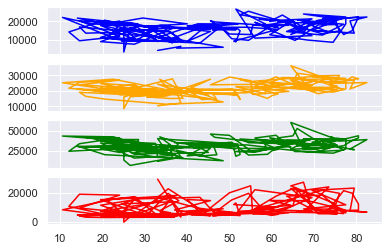

In [97]:
y1 = daily_with_weather_sorted_df['Morning']
y2 = daily_with_weather_sorted_df['Afternoon']
y3 = daily_with_weather_sorted_df['Evening']
y4 = daily_with_weather_sorted_df['Night']

x = daily_with_weather_sorted_df['TAVG']

fig, ax = plt.subplots(4)

#ax.set_ylabel('# of Trips')
#ax.set_title('# of Trips by Temperature and Time of Day')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
#ax.legend()

#ax.bar(x - width/2, y1, width, label='Morning', color = 'blue')
#ax.bar(x - width/2, y2, width, label='Afternoon', color ='orange')

ax[0].plot(x,y1, label='Morning', color = 'blue')
ax[1].plot(x,y2, label='Afternoon', color = 'orange')
ax[2].plot(x,y3, label='Evening', color = 'green')
ax[3].plot(x,y4, label='Night', color = 'red')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [98]:
#data above is all over the place because it is sorted by date instead of TAVG, HOWEVER!!
#we want it that way for now so that when we take the rolling average, we will be calculating the average from 1 week instead of
#from 7 observations of TAVG

In [105]:
daily_with_weather_sorted_df['rolling_morning'] = daily_with_weather_sorted_df.Morning.rolling(7, center= True).mean()
daily_with_weather_sorted_df['rolling_afternoon'] = daily_with_weather_sorted_df.Afternoon.rolling(7, center= True).mean() 
daily_with_weather_sorted_df['rolling_evening'] = daily_with_weather_sorted_df.Evening.rolling(7, center= True).mean() 
daily_with_weather_sorted_df['rolling_night'] = daily_with_weather_sorted_df.Night.rolling(7, center= True).mean() 
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,Snow,Prcp,TAVG,rolling_morning,rolling_afternoon,rolling_evening,rolling_night,Day
50,22025,25126,43511,8466,2015-02-20,19,2,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,10.5,NaN,NaN,NaN,NaN,4
46,14316,21612,24082,10781,2015-02-16,21,3,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,12.0,NaN,NaN,NaN,NaN,0
54,21677,21005,30207,4912,2015-02-24,24,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.0,NaN,NaN,NaN,NaN,1
45,9642,25404,33708,19117,2015-02-15,25,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.5,16938.142857,21759.000000,33045.000000,8655.857143,6
43,20238,23788,42552,9674,2015-02-13,21,8,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.5,16453.714286,21350.285714,32617.714286,8274.857143,4


In [106]:
#We sort the data above avg temp this time so the plot will make sense for us
daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])
# just to double check incase something went wrong
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,Snow,Prcp,TAVG,rolling_morning,rolling_afternoon,rolling_evening,rolling_night,Day
50,22025,25126,43511,8466,2015-02-20,19,2,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,10.5,NaN,NaN,NaN,NaN,4
46,14316,21612,24082,10781,2015-02-16,21,3,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,12.0,NaN,NaN,NaN,NaN,0
54,21677,21005,30207,4912,2015-02-24,24,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.0,NaN,NaN,NaN,NaN,1
45,9642,25404,33708,19117,2015-02-15,25,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.5,16938.142857,21759.000000,33045.000000,8655.857143,6
43,20238,23788,42552,9674,2015-02-13,21,8,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.5,16453.714286,21350.285714,32617.714286,8274.857143,4


In [107]:
# This is to create a numerical value for the day of week to make it easier to sort in the bar chart
daily_with_weather_sorted_df['Day'] = daily_with_weather_sorted_df['date'].dt.dayofweek
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,Snow,Prcp,TAVG,rolling_morning,rolling_afternoon,rolling_evening,rolling_night,Day
50,22025,25126,43511,8466,2015-02-20,19,2,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,10.5,NaN,NaN,NaN,NaN,4
46,14316,21612,24082,10781,2015-02-16,21,3,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,12.0,NaN,NaN,NaN,NaN,0
54,21677,21005,30207,4912,2015-02-24,24,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.0,NaN,NaN,NaN,NaN,1
45,9642,25404,33708,19117,2015-02-15,25,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.5,16938.142857,21759.000000,33045.000000,8655.857143,6
43,20238,23788,42552,9674,2015-02-13,21,8,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,0.0,0.0,14.5,16453.714286,21350.285714,32617.714286,8274.857143,4


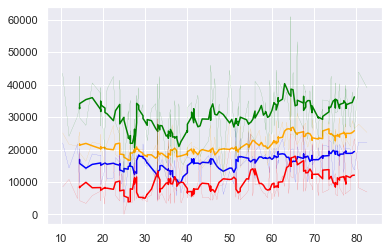

In [108]:
y1 = daily_with_weather_sorted_df['Morning']
y11 = daily_with_weather_sorted_df['rolling_morning']
y2 = daily_with_weather_sorted_df['Afternoon']
y22 = daily_with_weather_sorted_df['rolling_afternoon']
y3 = daily_with_weather_sorted_df['Evening']
y33 = daily_with_weather_sorted_df['rolling_evening']
y4 = daily_with_weather_sorted_df['Night']
y44 = daily_with_weather_sorted_df['rolling_night']

x = daily_with_weather_sorted_df['TAVG']
#x2 = daily_with_weather_sorted_df['rolling_temp']

#fig, ax = plt.subplots(4)

#ax.set_ylabel('# of Trips')
#ax.set_title('# of Trips by Temperature and Time of Day')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
#ax.legend()

#ax.bar(x - width/2, y1, width, label='Morning', color = 'blue')
#ax.bar(x - width/2, y2, width, label='Afternoon', color ='orange')

#plt.plot(x,y1)
#plt.plot(x,y11)

plt.plot(x,y1, label='Morning', color = 'blue', lw= 0.1)
plt.plot(x,y11, label='Morning', color = 'blue')

plt.plot(x,y2, label='Afternoon', color = 'orange', lw= 0.1)
plt.plot(x,y22, label='Afternoon', color = 'orange')

plt.plot(x,y3, label='Evening', color = 'green', lw=0.1)
plt.plot(x,y33, label='Evening', color = 'green')

plt.plot(x,y4, label='Night', color = 'red', lw= 0.1)
plt.plot(x,y44, label='Night', color = 'red')


#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

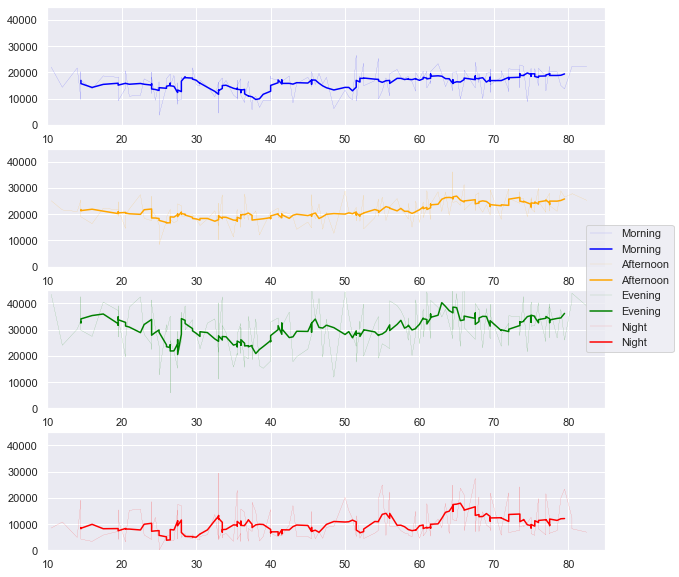

In [109]:
y1 = daily_with_weather_sorted_df['Morning']
y11 = daily_with_weather_sorted_df['rolling_morning']
y2 = daily_with_weather_sorted_df['Afternoon']
y22 = daily_with_weather_sorted_df['rolling_afternoon']
y3 = daily_with_weather_sorted_df['Evening']
y33 = daily_with_weather_sorted_df['rolling_evening']
y4 = daily_with_weather_sorted_df['Night']
y44 = daily_with_weather_sorted_df['rolling_night']

x = daily_with_weather_sorted_df['TAVG']

fig, ax = plt.subplots(4, figsize=(10,10))

ax[0].plot(x,y1, label='Morning', color = 'blue', lw= 0.1)
ax[0].plot(x,y11, label='Morning', color = 'blue')
ax[0].set_ylim([0, 45000])
ax[0].set_xlim([10, 85])

ax[1].plot(x,y2, label='Afternoon', color = 'orange', lw= 0.1)
ax[1].plot(x,y22, label='Afternoon', color = 'orange')
ax[1].set_ylim([0, 45000])
ax[1].set_xlim([10, 85])

ax[2].plot(x,y3, label='Evening', color = 'green', lw=0.1)
ax[2].plot(x,y33, label='Evening', color = 'green')
ax[2].set_ylim([0, 45000])
ax[2].set_xlim([10, 85])

ax[3].plot(x,y4, label='Night', color = 'red', lw= 0.1)
ax[3].plot(x,y44, label='Night', color = 'red')
ax[3].set_ylim([0, 45000])
ax[3].set_xlim([10, 85])

fig.legend(loc=7)

In [110]:
#ML for time series data??
#below this is to give binary values for different days
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily_with_weather_sorted_df[days[i]] = (daily_with_weather_sorted_df['date'].dt.dayofweek == i).astype(float)
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,...,rolling_evening,rolling_night,Day,Mon,Tue,Wed,Thu,Fri,Sat,Sun
50,22025,25126,43511,8466,2015-02-20,19,2,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,NaN,NaN,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46,14316,21612,24082,10781,2015-02-16,21,3,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,NaN,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54,21677,21005,30207,4912,2015-02-24,24,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45,9642,25404,33708,19117,2015-02-15,25,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,33045.000000,8655.857143,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43,20238,23788,42552,9674,2015-02-13,21,8,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,32617.714286,8274.857143,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'TAVG']

#column_names = ['TAVG']

X =  daily_with_weather_sorted_df[column_names]                                           
y111 = daily_with_weather_sorted_df['Morning']
y222 = daily_with_weather_sorted_df['Afternoon']
y333 = daily_with_weather_sorted_df['Evening']
y444 = daily_with_weather_sorted_df['Night']

In [112]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y111)
daily_with_weather_sorted_df['predicted_morning'] = model.predict(X)
daily_with_weather_sorted_df['predicted_morning'].head()

50    15684.325443
46    14649.521512
54    14974.010192
45     7718.740326
43    15998.555011
Name: predicted_morning, dtype: float64

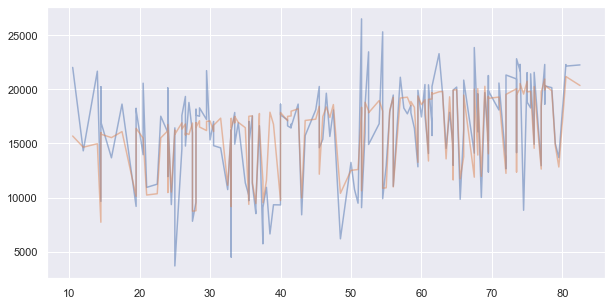

In [113]:
daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Morning']
y2 = daily_with_weather_sorted_df['predicted_morning']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))

In [114]:
params = pd.Series(model.coef_, index=X.columns)
params
#model.score(X, y1)

Mon     13706.832808
Tue     13874.206704
Wed     14280.596662
Thu     14718.791238
Fri     14859.472827
Sat      8583.647475
Sun      6579.658142
TAVG       78.557392
dtype: float64

In [115]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y111)).coef_
             for i in range(1000)], 0)

In [116]:
print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

       effect  error
Mon   13707.0  862.0
Tue   13874.0  993.0
Wed   14281.0  558.0
Thu   14719.0  848.0
Fri   14859.0  863.0
Sat    8584.0  607.0
Sun    6580.0  587.0
TAVG     79.0   10.0


Mon     13088.656204
Tue     14310.889427
Wed     15116.778850
Thu     16520.739877
Fri     17606.742331
Sat     20331.127743
Sun     17297.382004
TAVG      105.872409
dtype: float64

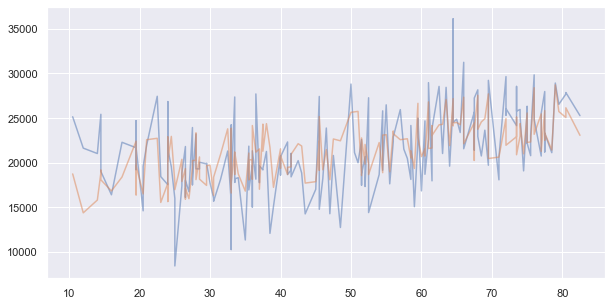

In [117]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y222)
daily_with_weather_sorted_df['predicted_afternoon'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Afternoon']
y2 = daily_with_weather_sorted_df['predicted_afternoon']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [118]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y222)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

       effect  error
Mon   13089.0  907.0
Tue   14311.0  922.0
Wed   15117.0  632.0
Thu   16521.0  797.0
Fri   17607.0  933.0
Sat   20331.0  873.0
Sun   17297.0  989.0
TAVG    106.0   11.0


Mon     16707.369349
Tue     23077.288132
Wed     25135.165530
Thu     29289.953783
Fri     31336.834104
Sat     32173.842315
Sun     16190.060711
TAVG      122.223315
dtype: float64

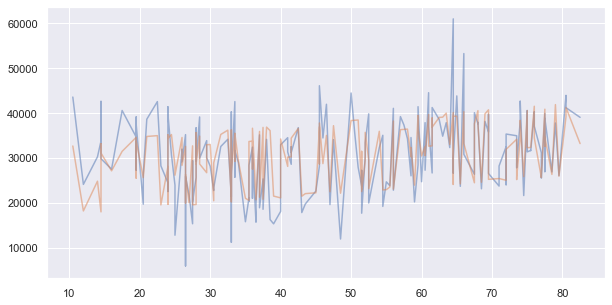

In [119]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y333)
daily_with_weather_sorted_df['predicted_evening'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Evening']
y2 = daily_with_weather_sorted_df['predicted_evening']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [120]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y333)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

       effect   error
Mon   16707.0  1543.0
Tue   23077.0  1515.0
Wed   25135.0  1154.0
Thu   29290.0  1590.0
Fri   31337.0  1749.0
Sat   32174.0  1606.0
Sun   16190.0  1590.0
TAVG    122.0    21.0


Mon      2517.079343
Tue      1628.751488
Wed      2498.723417
Thu      4260.299794
Fri      5633.318093
Sat     13238.957027
Sun     15455.979711
TAVG       71.048464
dtype: float64

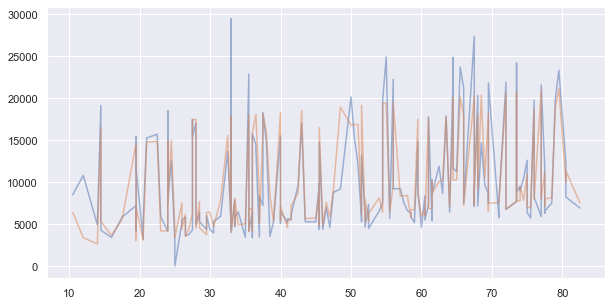

In [121]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y444)
daily_with_weather_sorted_df['predicted_night'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Night']
y2 = daily_with_weather_sorted_df['predicted_night']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [122]:
#daily_with_weather_sorted_df

In [123]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y444)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

       effect   error
Mon    2517.0   664.0
Tue    1629.0   536.0
Wed    2499.0   471.0
Thu    4260.0  1157.0
Fri    5633.0   569.0
Sat   13239.0   749.0
Sun   15456.0   836.0
TAVG     71.0     9.0


In [124]:
#daily_with_weather_sorted_df.groupby(['Morning','Afternoon','Evening','Night']).mean()
#daily_with_weather_sorted_df.groupby(['Morning'], as_index=False).size()
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,...,Tue,Wed,Thu,Fri,Sat,Sun,predicted_morning,predicted_afternoon,predicted_evening,predicted_night
50,22025,25126,43511,8466,2015-02-20,19,2,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,1.0,0.0,0.0,15684.325443,18718.402625,32620.178914,6379.326966
46,14316,21612,24082,10781,2015-02-16,21,3,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,0.0,0.0,0.0,14649.521512,14359.125112,18174.049133,3369.660912
54,21677,21005,30207,4912,2015-02-24,24,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,1.0,0.0,0.0,0.0,0.0,0.0,14974.010192,15793.103153,24788.414546,2623.429985
45,9642,25404,33708,19117,2015-02-15,25,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,0.0,0.0,1.0,7718.740326,18832.531935,17962.298783,16486.182440
43,20238,23788,42552,9674,2015-02-13,21,8,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,1.0,0.0,0.0,15998.555011,19141.892261,33109.072175,6663.520822


In [130]:
mean_df = daily_with_weather_sorted_df.groupby(['Day'], as_index=False).mean()
#daily_with_weather_sorted_df['Day'] = daily_with_weather_sorted_df['date'].dt.dayofweek
mean_df['Day'] = [0, 1, 2, 3, 4, 5, 6]
mean_df

,Day,Morning,Afternoon,Evening,Night,TMAX,TMIN,Latitude,Longitude,Snow,...,Tue,Wed,Thu,Fri,Sat,Sun,predicted_morning,predicted_afternoon,predicted_evening,predicted_night
0,0,17568.230769,18292.692308,22715.115385,6009.384615,57.000000,41.307692,40.77898,-73.96925,0.403846,...,0.0,0.0,0.0,0.0,0.0,0.0,17568.230769,18984.900235,22715.115385,7038.563880
1,1,17737.115385,19516.961538,29087.384615,5122.423077,56.730769,41.615385,40.77898,-73.96925,0.403846,...,1.0,0.0,0.0,0.0,0.0,0.0,17737.115385,20296.598669,29405.059460,6116.729207
2,2,18035.640000,20177.480000,30977.440000,5894.840000,55.680000,39.920000,40.77898,-73.96925,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,18035.640000,20417.245932,31143.631530,6395.646636
3,3,18347.538462,21411.230769,34935.730769,7542.192308,54.038462,38.346154,40.77898,-73.96925,0.288462,...,0.0,0.0,1.0,0.0,0.0,0.0,18347.538462,21289.879695,34272.089180,7426.034370
4,4,18489.730769,22499.269231,36984.961538,8916.576923,53.615385,38.807692,40.77898,-73.96925,0.269231,...,0.0,0.0,0.0,1.0,0.0,0.0,18489.730769,22249.849369,37017.154162,9414.232442
5,5,12238.076923,25256.230769,37859.576923,16544.076923,54.307692,38.730769,40.77898,-73.96925,0.288462,...,0.0,0.0,0.0,0.0,1.0,0.0,12238.076923,23987.776399,37509.709455,14618.263899
6,6,10509.038462,22593.038462,22303.576923,19009.769231,58.576923,41.461538,40.77898,-73.96925,0.234615,...,0.0,0.0,0.0,0.0,0.0,1.0,10509.038462,22529.874544,22807.418964,18049.054436


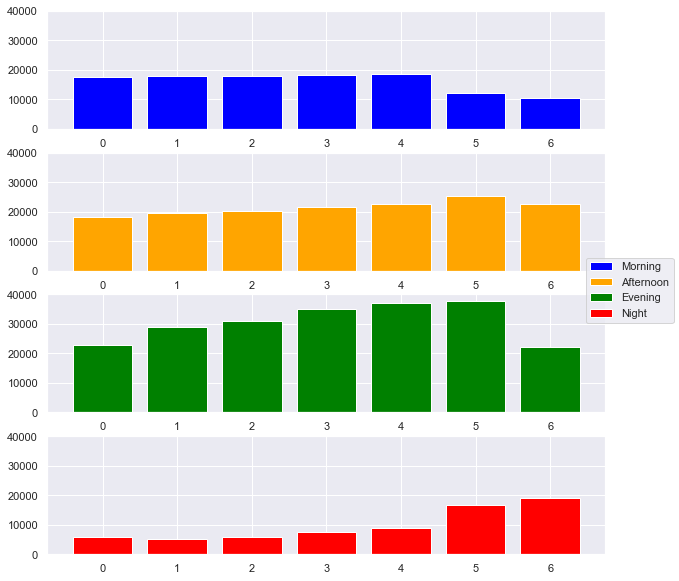

In [132]:
# the x axis is not sorted
y1 = mean_df['Morning']
y2 = mean_df['Afternoon']
y3 = mean_df['Evening']
y4 = mean_df['Night']

x2 = mean_df['Day'] 

#figsize is for subplot size
fig, ax = plt.subplots(4, figsize=(10,10), sharex= False, sharey=False)

ax[0].bar(x2,y1, label='Morning', color = 'blue')
ax[0].set_ylim([0, 40000])
#ax[0].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
#ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[1].bar(x2,y2, label='Afternoon', color = 'orange')
ax[1].set_ylim([0, 40000])
#ax[1].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
#ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[2].bar(x2,y3, label='Evening', color = 'green')
ax[2].set_ylim([0, 40000])
#ax[2].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
#ax[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[3].bar(x2,y4, label='Night', color = 'red')
ax[3].set_ylim([0, 40000])
#ax[3].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
#ax[3].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

fig.legend(loc=7)

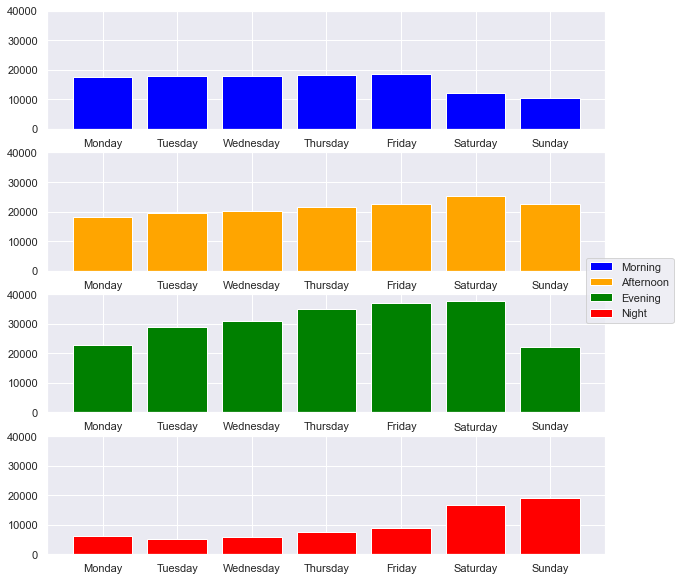

In [134]:
y1 = mean_df['Morning']
y2 = mean_df['Afternoon']
y3 = mean_df['Evening']
y4 = mean_df['Night']

x2 = mean_df['Day'] 

#figsize is for subplot size
fig, ax = plt.subplots(4, figsize=(10,10), sharex= False, sharey=False)

ax[0].bar(x2,y1, label='Morning', color = 'blue')
ax[0].set_ylim([0, 40000])
ax[0].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[1].bar(x2,y2, label='Afternoon', color = 'orange')
ax[1].set_ylim([0, 40000])
ax[1].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[2].bar(x2,y3, label='Evening', color = 'green')
ax[2].set_ylim([0, 40000])
ax[2].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[3].bar(x2,y4, label='Night', color = 'red')
ax[3].set_ylim([0, 40000])
ax[3].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[3].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

fig.legend(loc=7)

In [135]:
mean_df

,Day,Morning,Afternoon,Evening,Night,TMAX,TMIN,Latitude,Longitude,Snow,...,Tue,Wed,Thu,Fri,Sat,Sun,predicted_morning,predicted_afternoon,predicted_evening,predicted_night
0,0,17568.230769,18292.692308,22715.115385,6009.384615,57.000000,41.307692,40.77898,-73.96925,0.403846,...,0.0,0.0,0.0,0.0,0.0,0.0,17568.230769,18984.900235,22715.115385,7038.563880
1,1,17737.115385,19516.961538,29087.384615,5122.423077,56.730769,41.615385,40.77898,-73.96925,0.403846,...,1.0,0.0,0.0,0.0,0.0,0.0,17737.115385,20296.598669,29405.059460,6116.729207
2,2,18035.640000,20177.480000,30977.440000,5894.840000,55.680000,39.920000,40.77898,-73.96925,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,18035.640000,20417.245932,31143.631530,6395.646636
3,3,18347.538462,21411.230769,34935.730769,7542.192308,54.038462,38.346154,40.77898,-73.96925,0.288462,...,0.0,0.0,1.0,0.0,0.0,0.0,18347.538462,21289.879695,34272.089180,7426.034370
4,4,18489.730769,22499.269231,36984.961538,8916.576923,53.615385,38.807692,40.77898,-73.96925,0.269231,...,0.0,0.0,0.0,1.0,0.0,0.0,18489.730769,22249.849369,37017.154162,9414.232442
5,5,12238.076923,25256.230769,37859.576923,16544.076923,54.307692,38.730769,40.77898,-73.96925,0.288462,...,0.0,0.0,0.0,0.0,1.0,0.0,12238.076923,23987.776399,37509.709455,14618.263899
6,6,10509.038462,22593.038462,22303.576923,19009.769231,58.576923,41.461538,40.77898,-73.96925,0.234615,...,0.0,0.0,0.0,0.0,0.0,1.0,10509.038462,22529.874544,22807.418964,18049.054436


In [137]:
calc_df = mean_df[['Day','Morning','Afternoon','Evening','Night']].copy()
calc_df

,Day,Morning,Afternoon,Evening,Night
0,0,17568.230769,18292.692308,22715.115385,6009.384615
1,1,17737.115385,19516.961538,29087.384615,5122.423077
2,2,18035.640000,20177.480000,30977.440000,5894.840000
3,3,18347.538462,21411.230769,34935.730769,7542.192308
4,4,18489.730769,22499.269231,36984.961538,8916.576923
5,5,12238.076923,25256.230769,37859.576923,16544.076923
6,6,10509.038462,22593.038462,22303.576923,19009.769231


In [141]:
calc_df['Day_of_week'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday']
calc_df['Total'] = calc_df['Morning'] + calc_df['Afternoon'] + calc_df['Evening'] + calc_df['Night']
calc_df

,Day,Morning,Afternoon,Evening,Night,Total,Day_of_week
0,0,17568.230769,18292.692308,22715.115385,6009.384615,64585.423077,Monday
1,1,17737.115385,19516.961538,29087.384615,5122.423077,71463.884615,Tuesday
2,2,18035.640000,20177.480000,30977.440000,5894.840000,75085.400000,Wednesday
3,3,18347.538462,21411.230769,34935.730769,7542.192308,82236.692308,Thursday
4,4,18489.730769,22499.269231,36984.961538,8916.576923,86890.538462,Friday
5,5,12238.076923,25256.230769,37859.576923,16544.076923,91897.961538,Saturday
6,6,10509.038462,22593.038462,22303.576923,19009.769231,74415.423077,Sunday


In [142]:
calc_df['Morning_pct'] = calc_df['Morning']/calc_df['Total'] * 100
calc_df['Afternoon_pct'] = calc_df['Afternoon']/calc_df['Total'] * 100
calc_df['Evening_pct'] = calc_df['Evening']/calc_df['Total'] * 100
calc_df['Night_pct'] = calc_df['Night']/calc_df['Total'] * 100


In [143]:
calc_df['Check'] = calc_df['Morning_pct'] + calc_df['Afternoon_pct'] + calc_df['Evening_pct'] + calc_df['Night_pct']
calc_df

,Day,Morning,Afternoon,Evening,Night,Total,Day_of_week,Morning_pct,Afternoon_pct,Evening_pct,Night_pct,Check
0,0,17568.230769,18292.692308,22715.115385,6009.384615,64585.423077,Monday,27.201542,28.323252,35.170654,9.304553,100.0
1,1,17737.115385,19516.961538,29087.384615,5122.423077,71463.884615,Tuesday,24.819691,27.310244,40.702216,7.167849,100.0
2,2,18035.640000,20177.480000,30977.440000,5894.840000,75085.400000,Wednesday,24.020169,26.872708,41.256276,7.850847,100.0
3,3,18347.538462,21411.230769,34935.730769,7542.192308,82236.692308,Thursday,22.310647,26.036104,42.481926,9.171323,100.0
4,4,18489.730769,22499.269231,36984.961538,8916.576923,86890.538462,Friday,21.279337,25.893808,42.565004,10.261850,100.0
5,5,12238.076923,25256.230769,37859.576923,16544.076923,91897.961538,Saturday,13.317028,27.482906,41.197407,18.002659,100.0
6,6,10509.038462,22593.038462,22303.576923,19009.769231,74415.423077,Sunday,14.122124,30.360693,29.971713,25.545470,100.0


In [144]:
calc_df.mean()

Day                  3.000000
Morning          16132.195824
Afternoon        21392.414725
Evening          30694.826593
Night             9862.751868
Total            78082.189011
Morning_pct         21.010077
Afternoon_pct       27.468531
Evening_pct         39.049314
Night_pct           12.472079
Check              100.000000
dtype: float64

In [145]:
#THE MAIN CODE ENDS HERE, BELOW HERE IS TESTS!!!!


In [146]:
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,date,TMAX,TMIN,Name,Latitude,Longitude,...,Tue,Wed,Thu,Fri,Sat,Sun,predicted_morning,predicted_afternoon,predicted_evening,predicted_night
50,22025,25126,43511,8466,2015-02-20,19,2,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,1.0,0.0,0.0,15684.325443,18718.402625,32620.178914,6379.326966
46,14316,21612,24082,10781,2015-02-16,21,3,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,0.0,0.0,0.0,14649.521512,14359.125112,18174.049133,3369.660912
54,21677,21005,30207,4912,2015-02-24,24,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,1.0,0.0,0.0,0.0,0.0,0.0,14974.010192,15793.103153,24788.414546,2623.429985
45,9642,25404,33708,19117,2015-02-15,25,4,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,0.0,0.0,1.0,7718.740326,18832.531935,17962.298783,16486.182440
43,20238,23788,42552,9674,2015-02-13,21,8,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,...,0.0,0.0,0.0,1.0,0.0,0.0,15998.555011,19141.892261,33109.072175,6663.520822


In [147]:
list(daily_with_weather_sorted_df)

['Morning',
 'Afternoon',
 'Evening',
 'Night',
 'date',
 'TMAX',
 'TMIN',
 'Name',
 'Latitude',
 'Longitude',
 'Snow',
 'Prcp',
 'TAVG',
 'rolling_morning',
 'rolling_afternoon',
 'rolling_evening',
 'rolling_night',
 'Day',
 'Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 'predicted_morning',
 'predicted_afternoon',
 'predicted_evening',
 'predicted_night']

In [151]:
daily_with_weather_sorted_df['dry_day'] = (daily_with_weather_sorted_df['Prcp'] == 0).astype(int)

Mon        14162.474046
Tue        14141.651236
Wed        14838.440269
Thu        15335.828213
Fri        15342.083426
Sat         9012.478940
Sun         7008.389451
TAVG          78.586008
dry_day     -699.014293
dtype: float64

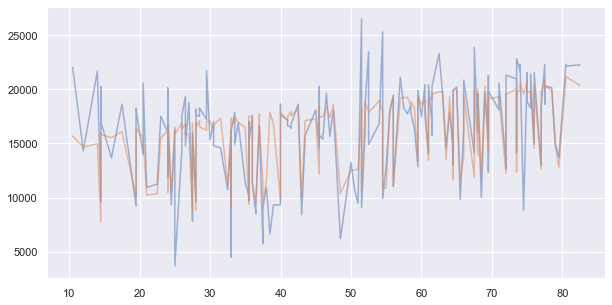

In [153]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'TAVG', 'dry_day']

#column_names = ['TAVG']

X =  daily_with_weather_sorted_df[column_names]                                           
y111 = daily_with_weather_sorted_df['Morning']
y222 = daily_with_weather_sorted_df['Afternoon']
y333 = daily_with_weather_sorted_df['Evening']
y444 = daily_with_weather_sorted_df['Night']

model = LinearRegression(fit_intercept=False)
model.fit(X, y111)
daily_with_weather_sorted_df['predicted_afternoon'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Morning']
y2 = daily_with_weather_sorted_df['predicted_morning']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [163]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y111)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

          effect   error
Mon      13665.0   919.0
Tue      14649.0  1057.0
Wed      15822.0   725.0
Thu      17301.0   930.0
Fri      18217.0   902.0
Sat      20873.0   709.0
Sun      17840.0   679.0
TAVG       106.0    11.0
dry_day   -884.0   479.0


Mon        13664.838244
Tue        14649.086946
Wed        15822.201100
Thu        17301.015219
Fri        18217.028530
Sat        20873.407430
Sun        17839.535040
TAVG         105.908595
dry_day     -883.939924
dtype: float64

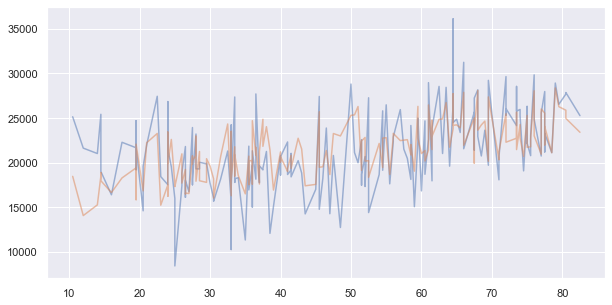

In [162]:
X =  daily_with_weather_sorted_df[column_names]                                           
y111 = daily_with_weather_sorted_df['Morning']
y222 = daily_with_weather_sorted_df['Afternoon']
y333 = daily_with_weather_sorted_df['Evening']
y444 = daily_with_weather_sorted_df['Night']

model = LinearRegression(fit_intercept=False)
model.fit(X, y222)
daily_with_weather_sorted_df['predicted_afternoon'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Afternoon']
y2 = daily_with_weather_sorted_df['predicted_afternoon']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [164]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y222)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

          effect   error
Mon      13665.0   935.0
Tue      14649.0   987.0
Wed      15822.0   736.0
Thu      17301.0   892.0
Fri      18217.0   984.0
Sat      20873.0   947.0
Sun      17840.0  1051.0
TAVG       106.0    12.0
dry_day   -884.0   567.0


Mon        17081.759995
Tue        23297.041575
Wed        25593.533673
Thu        29796.959849
Fri        31733.384896
Sat        32526.203943
Sun        16542.340045
TAVG         122.246828
dry_day     -574.365072
dtype: float64

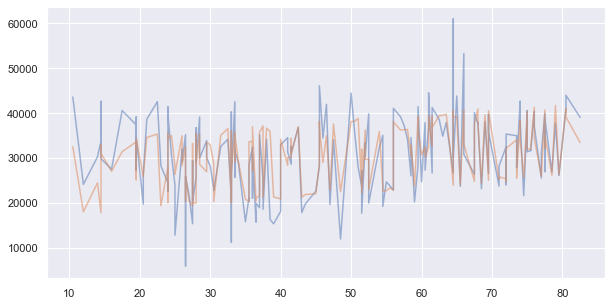

In [160]:
X =  daily_with_weather_sorted_df[column_names]                                           
y111 = daily_with_weather_sorted_df['Morning']
y222 = daily_with_weather_sorted_df['Afternoon']
y333 = daily_with_weather_sorted_df['Evening']
y444 = daily_with_weather_sorted_df['Night']

model = LinearRegression(fit_intercept=False)
model.fit(X, y333)
daily_with_weather_sorted_df['predicted_evening'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Evening']
y2 = daily_with_weather_sorted_df['predicted_evening']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [165]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y333)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

          effect   error
Mon      13665.0  1675.0
Tue      14649.0  1591.0
Wed      15822.0  1337.0
Thu      17301.0  1692.0
Fri      18217.0  1827.0
Sat      20873.0  1816.0
Sun      17840.0  1661.0
TAVG       106.0    22.0
dry_day   -884.0   958.0


Mon         2292.609218
Tue         1496.995838
Wed         2223.903638
Thu         3956.318601
Fri         5395.561602
Sat        13027.694647
Sun        15244.766671
TAVG          71.034367
dry_day      344.367043
dtype: float64

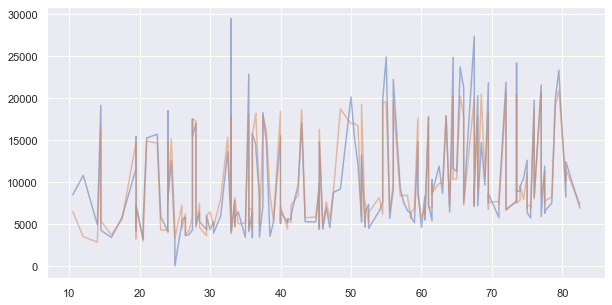

In [161]:
X =  daily_with_weather_sorted_df[column_names]                                           
y111 = daily_with_weather_sorted_df['Morning']
y222 = daily_with_weather_sorted_df['Afternoon']
y333 = daily_with_weather_sorted_df['Evening']
y444 = daily_with_weather_sorted_df['Night']

model = LinearRegression(fit_intercept=False)
model.fit(X, y444)
daily_with_weather_sorted_df['predicted_night'] = model.predict(X)

daily_with_weather_sorted_df = daily_with_weather_sorted_df.sort_values(by=['TAVG'])

y1 = daily_with_weather_sorted_df['Night']
y2 = daily_with_weather_sorted_df['predicted_night']
x = daily_with_weather_sorted_df['TAVG']

plt.figure(figsize=(10,5))
plt.plot(x, y1, alpha = 0.5)
plt.plot(x, y2, alpha = 0.5)
#daily_with_weather_sorted_df[['Morning', 'predicted_morning']].plot(alpha=0.5, figsize=(10,10))
params = pd.Series(model.coef_, index=X.columns)
params

In [166]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y444)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),'error': err.round(0)}))

          effect   error
Mon      13665.0   635.0
Tue      14649.0   534.0
Wed      15822.0   527.0
Thu      17301.0  1143.0
Fri      18217.0   579.0
Sat      20873.0   845.0
Sun      17840.0   856.0
TAVG       106.0     9.0
dry_day   -884.0   422.0


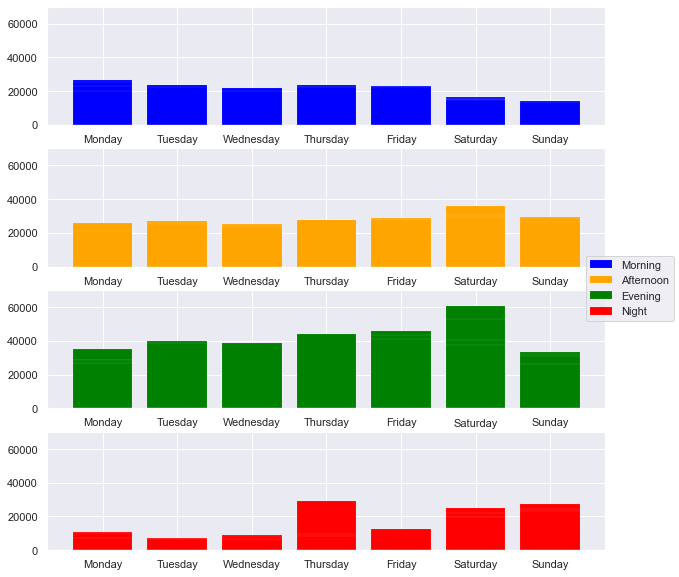

In [880]:
#CODE BELOW IS NOT MEAN, IT ONLY TOOK THE FIRSTH 7 DATA


y1 = daily_with_weather_sorted_df['Morning']
y11 = daily_with_weather_sorted_df['rolling_morning']
y2 = daily_with_weather_sorted_df['Afternoon']
y22 = daily_with_weather_sorted_df['rolling_afternoon']
y3 = daily_with_weather_sorted_df['Evening']
y33 = daily_with_weather_sorted_df['rolling_evening']
y4 = daily_with_weather_sorted_df['Night']
y44 = daily_with_weather_sorted_df['rolling_night']

x = daily_with_weather_sorted_df['TAVG']
x2 = daily_with_weather_sorted_df['Day'] 
x3 = daily_with_weather_sorted_df['Day_of_week']

def plot_function(ax):
    ax.set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
    ax.set_xtickslabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])



#figsize is for subplot size
fig, ax = plt.subplots(4, figsize=(10,10), sharex= False, sharey=True)

#ax.set_ylabel('# of Trips')
#ax.set_title('# of Trips by Temperature and Time of Day')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
#ax.legend()

#ax.bar(x - width/2, y1, width, label='Morning', color = 'blue')
#ax.bar(x - width/2, y2, width, label='Afternoon', color ='orange')

#plt.plot(x,y1)
#plt.plot(x,y11)

#plt.xticks([])
#plt.xticks([0, 1, 2 ,3 ,4 ,5 ,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

ax[0].bar(x2,y1, label='Morning', color = 'blue', lw= 0.1)
ax[0].set_ylim([0, 70000])
ax[0].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

#ax[0].bar(x2,y11, label='Morning', color = 'blue')

ax[1].bar(x2,y2, label='Afternoon', color = 'orange', lw= 0.1)
ax[1].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

#ax[1].set_ylim([0, 65000])
#ax[1].bar(x2,y22, label='Afternoon', color = 'orange')

ax[2].bar(x2,y3, label='Evening', color = 'green', lw=0.1)
ax[2].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])

#ax[2].set_ylim([0, 65000])
#ax[2].bar(x2,y33, label='Evening', color = 'green')

ax[3].bar(x2,y4, label='Night', color = 'red', lw= 0.1)
ax[3].set_xticks([0, 1, 2 ,3 ,4 ,5 ,6])
ax[3].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])
#ax[3].set_ylim([0, 65000])
#ax[3].bar(x2,y44, label='Night', color = 'red')

#field = daily_with_weather_sorted_df['Day_of_week']
#day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday']
#ax = df.set_index(field).loc[day_order].plot(kind="bar")

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.legend(loc=7)
#plt.xticks([0, 1, 2 ,3 ,4 ,5 ,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])



In [957]:
daily_with_weather_sorted_df.head()

,Morning,Afternoon,Evening,Night,Day_of_week,PRCP,TAVG,date,TMAX,TMIN,...,Mon,Tue,Wed,Thu,Fri,Sat,Sun,predicted_afternoon,predicted_evening,predicted_night
50,22025,25126,43511,8466,Friday,NaN,10.5,2015-02-20,19,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18718.402625,32620.178914,6379.326966
46,14316,21612,24082,10781,Monday,NaN,12.0,2015-02-16,21,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14359.125112,18174.049133,3369.660912
54,21677,21005,30207,4912,Tuesday,NaN,14.0,2015-02-24,24,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15793.103153,24788.414546,2623.429985
45,9642,25404,33708,19117,Sunday,NaN,14.5,2015-02-15,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18832.531935,17962.298783,16486.182440
43,20238,23788,42552,9674,Friday,NaN,14.5,2015-02-13,21,8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19141.892261,33109.072175,6663.520822


In [965]:
# Things to report from the above graph
#y1 = daily_with_weather_sorted_df['Morning']
#y11 = daily_with_weather_sorted_df['rolling_morning']
#y2 = daily_with_weather_sorted_df['Afternoon']
#y22 = daily_with_weather_sorted_df['rolling_afternoon']
#y3 = daily_with_weather_sorted_df['Evening']
#y33 = daily_with_weather_sorted_df['rolling_evening']
#y4 = daily_with_weather_sorted_df['Night']
#y44 = daily_with_weather_sorted_df['rolling_night']

#x = daily_with_weather_sorted_df['TAVG']
#x2 = daily_with_weather_sorted_df['Day'] 
#x3 = daily_with_weather_sorted_df['Day_of_week']

#calc_df['Morning'] = df.daily_with_weather_sorted_df['predicted_morning']
#calc_df['Afternoon'] = df.daily_with_weather_sorted_df['predicted_afternoon']
#calc_df['Evening'] = df.daily_with_weather_sorted_df['predicted_evening']
#calc_df['Night'] = df.daily_with_weather_sorted_df['predicted_night']

calc_df = daily_with_weather_sorted_df[['Morning','Afternoon','Evening','Night']].copy()

In [970]:
calc_df.head()

,Morning,Afternoon,Evening,Night
50,22025,25126,43511,8466
46,14316,21612,24082,10781
54,21677,21005,30207,4912
45,9642,25404,33708,19117
43,20238,23788,42552,9674


In [1158]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'TAVG']

#column_names = ['TAVG']

X =  daily_with_weather_sorted_df[column_names]                                           
y111 = daily_with_weather_sorted_df['Morning']
y222 = daily_with_weather_sorted_df['Afternoon']
y333 = daily_with_weather_sorted_df['Evening']
y444 = daily_with_weather_sorted_df['Night']

In [1160]:
X.describe(include='all')

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,TAVG
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.143646,0.143646,0.138122,0.143646,0.143646,0.143646,0.143646,47.867403
std,0.351704,0.351704,0.345985,0.351704,0.351704,0.351704,0.351704,19.576746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.500000


In [1163]:
from sklearn.model_selection import train_test_split
#for morning dataset
X_train, X_test, y_train, y_test = train_test_split(X, y111, random_state=42)

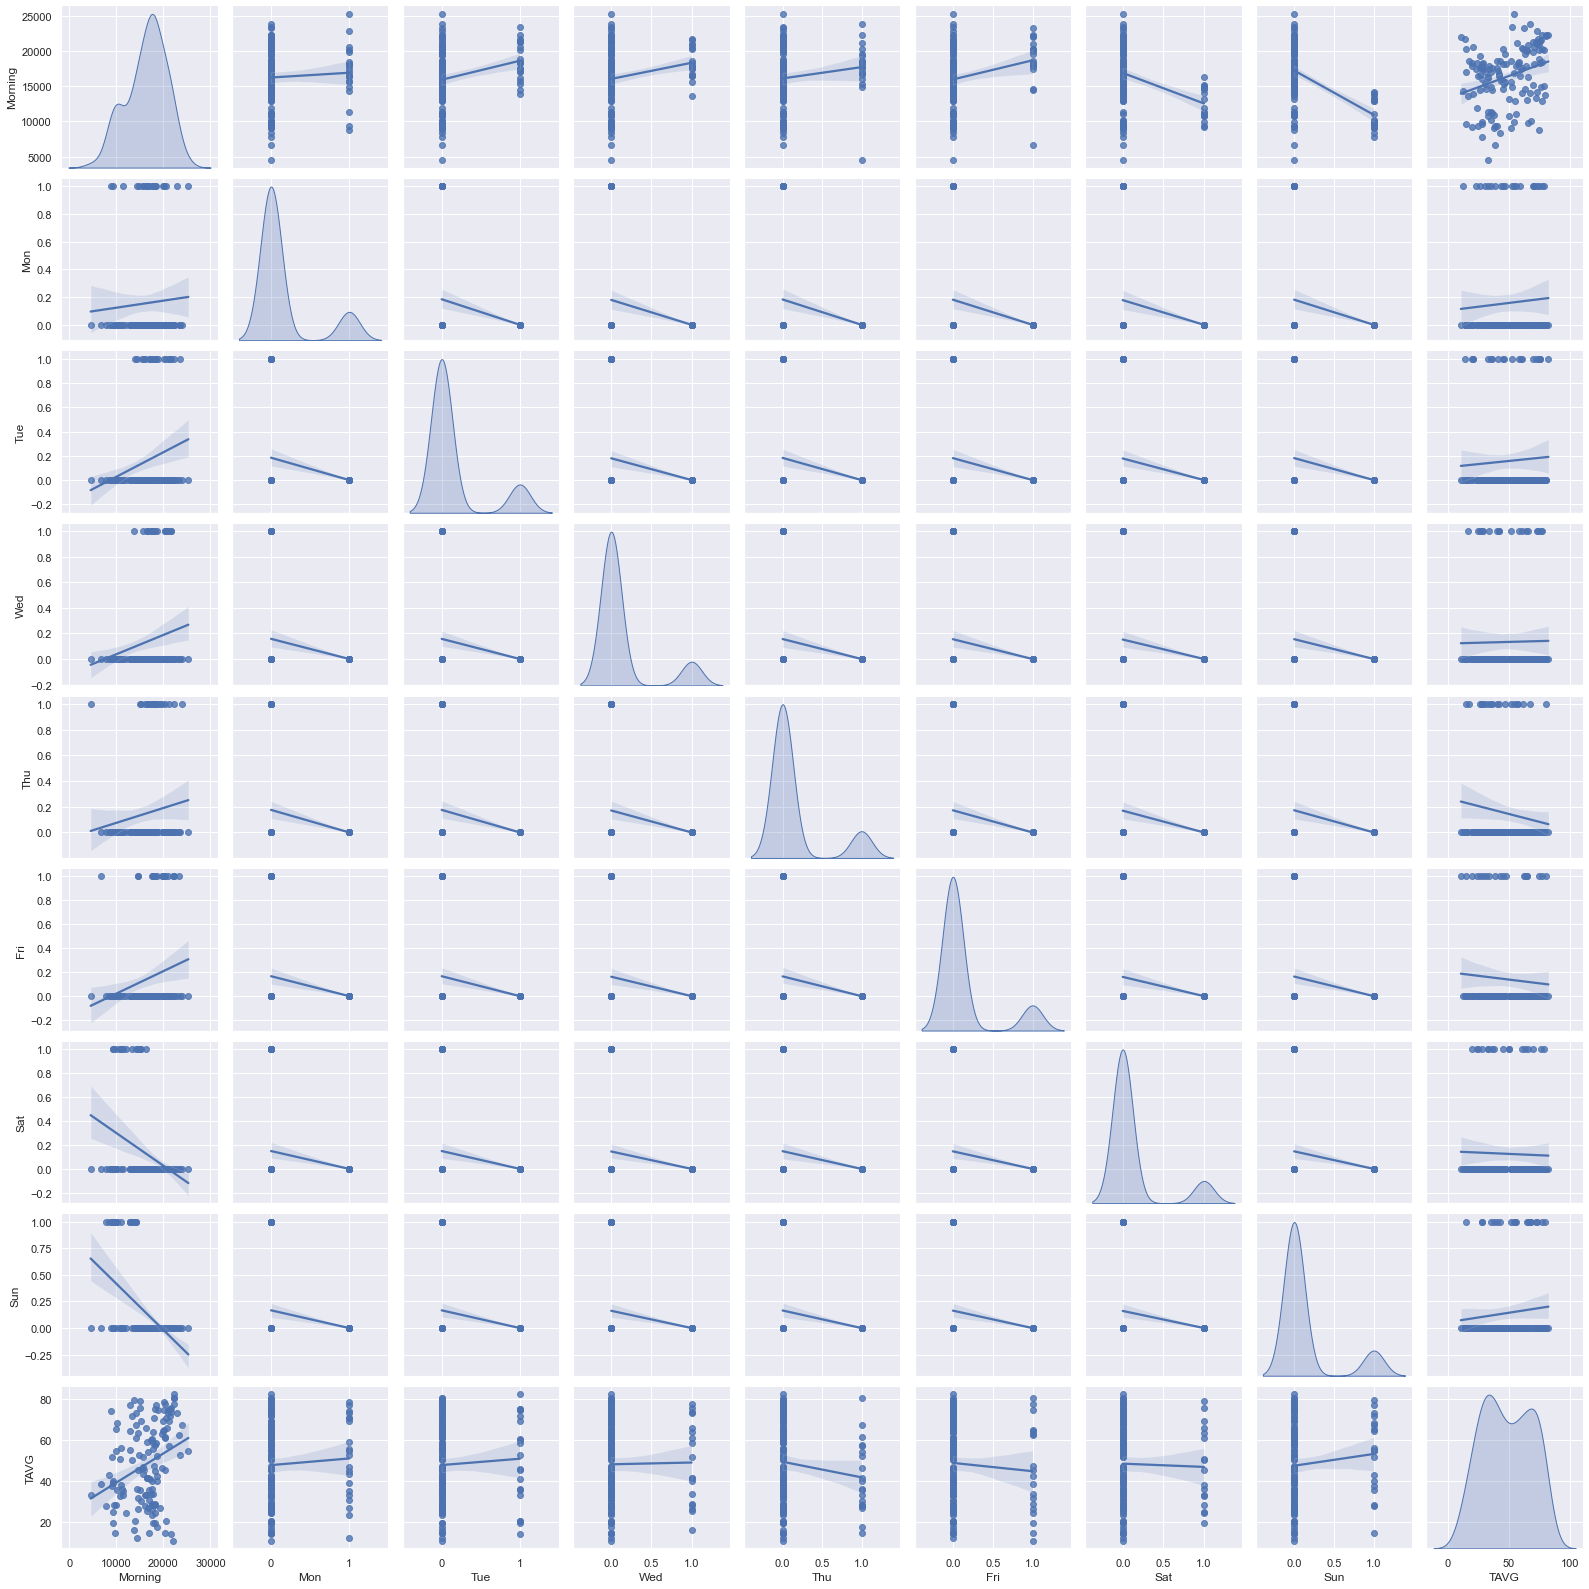

In [1168]:
train_dataset = X_train.copy()
train_dataset.insert(0, "Morning", y_train)
_= sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

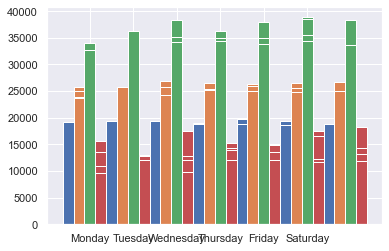

In [825]:
y1 = daily_with_weather_sorted_df['Morning']
y11 = daily_with_weather_sorted_df['rolling_morning']
y2 = daily_with_weather_sorted_df['Afternoon']
y22 = daily_with_weather_sorted_df['rolling_afternoon']
y3 = daily_with_weather_sorted_df['Evening']
y33 = daily_with_weather_sorted_df['rolling_evening']
y4 = daily_with_weather_sorted_df['Night']
y44 = daily_with_weather_sorted_df['rolling_night']

x = daily_with_weather_sorted_df['TAVG']
x2 = daily_with_weather_sorted_df['Day'] 
x3 = daily_with_weather_sorted_df['Day_of_week']

N = 7
width = (1/4)
ind = np.arange(N)

ax = plt.subplot(111)

ax.bar(x2-(2*width), y11, width=width)
ax.bar(x2-(1*width), y22, width=width)
ax.bar(x2-(0*width), y33, width=width)
ax.bar(x2+(1*width), y44, width=width)
plt.xticks([0, 1, 2 ,3 ,4 ,5 ,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday'])


In [435]:
daily_with_tavg2.head()

,Morning,Afternoon,Evening,Night,Day_of_week,date,avgTemp_F,avgTemp_C
0,4500.0,10248.0,11215.0,29420.0,Thursday,2015-01-01,46.58,8.1
1,6635.0,12059.0,16253.0,3523.0,Friday,2015-01-02,48.02,8.9
2,5721.0,19175.0,25308.0,7181.0,Saturday,2015-01-03,49.82,9.9
3,6184.0,12717.0,11928.0,9170.0,Sunday,2015-01-04,52.16,11.2
4,11357.0,11316.0,15771.0,3414.0,Monday,2015-01-05,58.64,14.8


In [572]:
x = daily_with_tavg2['date']
y1 = daily_with_tavg2['Morning']
y2 = daily_with_tavg2['Afternoon']
y3 = daily_with_tavg2['Evening']
y4 = daily_with_tavg2['Night']

Text(0.5, 0, 'Pickup Date')

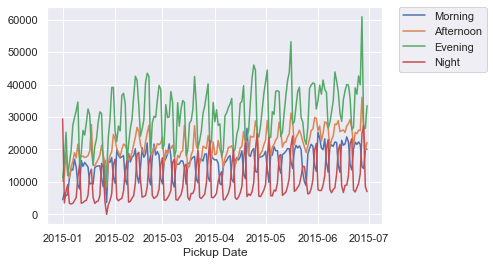

In [573]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

plt.plot(x,y1, label = "Morning")
plt.plot(x,y2, label = "Afternoon")
plt.plot(x,y3, label = "Evening")
plt.plot(x,y4, label = "Night")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pickup Date')

In [436]:
#KERJAIN scikit pake data ini
daily_with_tavg2.head()

,Morning,Afternoon,Evening,Night,Day_of_week,date,avgTemp_F,avgTemp_C
0,4500.0,10248.0,11215.0,29420.0,Thursday,2015-01-01,46.58,8.1
1,6635.0,12059.0,16253.0,3523.0,Friday,2015-01-02,48.02,8.9
2,5721.0,19175.0,25308.0,7181.0,Saturday,2015-01-03,49.82,9.9
3,6184.0,12717.0,11928.0,9170.0,Sunday,2015-01-04,52.16,11.2
4,11357.0,11316.0,15771.0,3414.0,Monday,2015-01-05,58.64,14.8


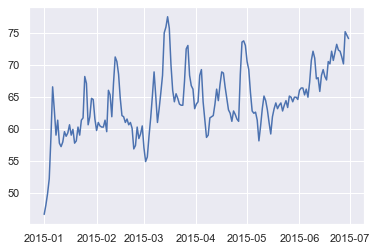

In [449]:
y = daily_with_tavg2['avgTemp_F']
x=  daily_with_tavg2['date']
plt.plot(x,y)

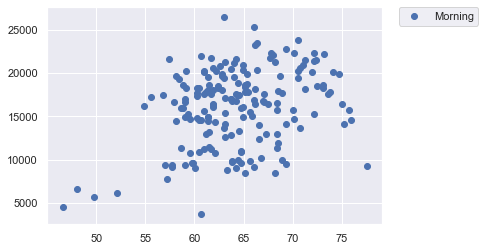

In [445]:
y = daily_with_tavg2['Morning']
x = daily_with_tavg2['avgTemp_F']
plt.scatter(x, y, label ='Morning')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

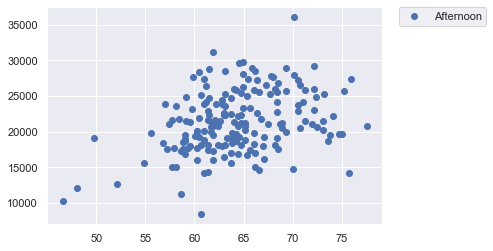

In [446]:
y = daily_with_tavg2['Afternoon']
x = daily_with_tavg2['avgTemp_F']
plt.scatter(x, y, label = 'Afternoon')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

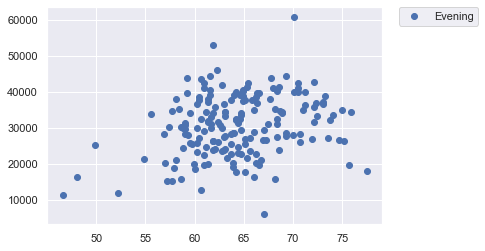

In [447]:
y = daily_with_tavg2['Evening']
x = daily_with_tavg2['avgTemp_F']
plt.scatter(x, y, label = 'Evening')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

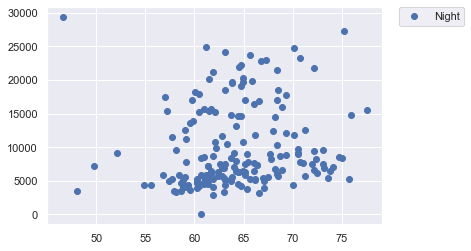

In [448]:
y = daily_with_tavg2['Night']
x = daily_with_tavg2['avgTemp_F']
plt.scatter(x, y, label = 'Night')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [413]:
daily_with_tavg2 = daily_with_tavg2.dropna()

<AxesSubplot:>

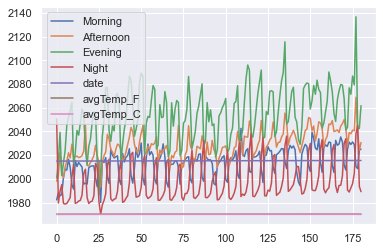

In [416]:
daily_with_tavg2.plot()

Text(0.5, 0, 'Pickup Date')

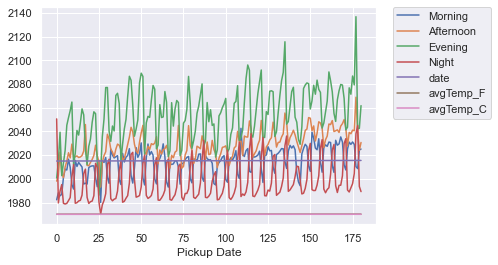

In [420]:
daily_with_tavg2.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pickup Date')


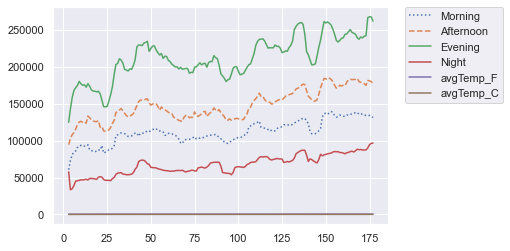

In [421]:
daily_with_tavg2.rolling(7, center=True,
 win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [184]:
#df_plot.drop(df_plot.index, inplace=True) this is to delete df_plot

In [408]:
#daily_with_tavg2 =daily_with_tavg2.drop('TAVG', axis=1)

In [214]:
df_plot2= df.pivot_table(index=['Day_of_week'], values='Affiliated_base_num', aggfunc='count')


In [215]:
#df_plot = df.groupby(['Day_of_week', 'Borough']).count()

In [216]:
#y = pd.DataFrame(df_plot['Pickup_date'])
#x = df_plot['Time']
df_plot2


,Affiliated_base_num
Day_of_week,
Friday,2254845
Monday,1675997
Saturday,2384595
Sunday,1930300
Thursday,2134255
Tuesday,1854647
Wednesday,1873645


<AxesSubplot:xlabel='Day_of_week'>

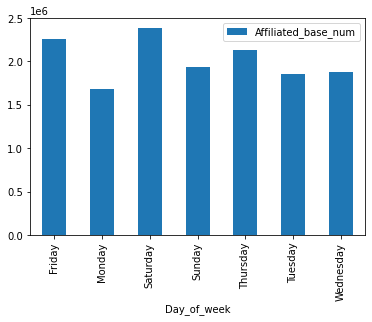

In [224]:
df_plot2.plot(kind='bar')

In [ ]:
# Plot daily data

In [228]:
df.groupby(['Date']).count()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Borough,Zone,Time,Day_of_week,Morning,Afternoon,Evening,Night,Day_category
Date,,,,,,,,,,,,,
2015-01-01,55383,55383,55383,55383,55383,55383,55383,55383,55383,55383,55383,55383,55383
2015-01-02,38469,38469,38469,38469,38469,38469,38469,38469,38469,38469,38469,38469,38469
2015-01-03,57383,57383,57383,57383,57383,57383,57383,57383,57383,57383,57383,57383,57383
2015-01-04,39998,39998,39998,39998,39998,39998,39998,39998,39998,39998,39998,39998,39998
2015-01-05,41858,41858,41858,41858,41858,41858,41858,41858,41858,41858,41858,41858,41858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-26,99508,99508,99508,99508,99508,99508,99508,99508,99508,99508,99508,99508,99508
2015-06-27,136193,136193,136193,136193,136193,136193,136193,136193,136193,136193,136193,136193,136193
2015-06-28,93108,93108,93108,93108,93108,93108,93108,93108,93108,93108,93108,93108,93108
